# Support Vector Machines Lab

In this lab we will explore several datasets with SVMs. The assets folder contains several datasets (in order of complexity):

1. Breast cancer

For each of these a `.names` file is provided with details on the origin of data.

In [41]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn import grid_search
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.cross_validation import train_test_split

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
X.head()
y = data.target
y_as_df = pd.DataFrame(data.target, columns=['benign'])

# Exercise 1: Breast Cancer



## 1.a: Load the Data
- Are there any missing values? (how are they encoded? do we impute them?)
- Are the features categorical or numerical?
- Are the values normalized?
- How many classes are there in the target?

Perform what's necessary to get to a point where you have a feature matrix `X` and a target vector `y`, both with only numerical entries.

In [3]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,

In [12]:

all_scores = []

model1 = SVC(kernel='rbf')
model2 = SVC(kernel='linear')

scores1 = cross_val_score(model1, X, y, cv=4)
scores2 = cross_val_score(model2, X, y, cv=4)

sm1 = scores1.mean()
ss1 = scores1.std()

sm2 = scores2.mean()
ss2 = scores2.std()

print sm1,ss1,sm2,ss2

0.627413079878 0.0011301917266 0.943772776519 0.00482419640484


In [14]:
model1 = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
model2 = make_pipeline(StandardScaler(), SVC(kernel='linear'))

scores1 = cross_val_score(model1, X, y, cv=4)
scores2 = cross_val_score(model2, X, y, cv=4)

sm1 = scores1.mean()
ss1 = scores1.std()

sm2 = scores2.mean()
ss2 = scores2.std()

print sm1,ss1,sm2,ss2

0.971892544076 0.00489295608084 0.973653107456 0.00574656552838


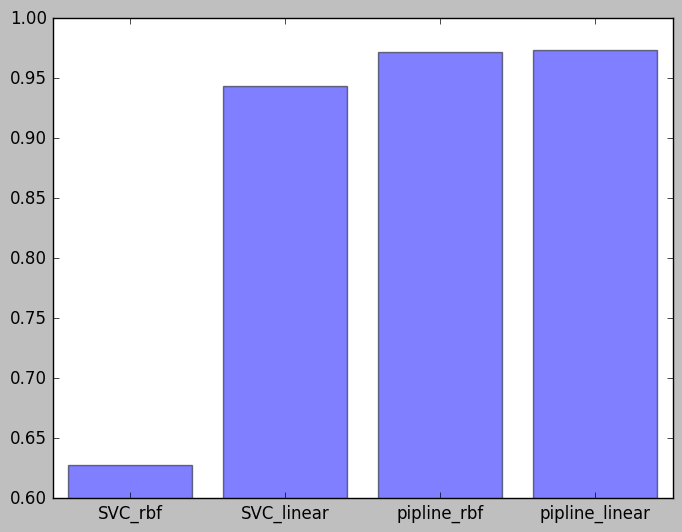

In [22]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('SVC_rbf','SVC_linear','pipline_rbf','pipline_linear')
y_pos = np.arange(len(objects))
performance = [0.627413079878 , 0.943772776519 ,0.971892544076 , 0.973653107456 ]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylim(0.6,1)
 
plt.show()

## 1.b: Model Building

- What's the baseline for the accuracy?
- Initialize and train a linear svm. What's the average accuracy score with a 3-fold cross validation?
- Repeat using an rbf classifier. Compare the scores. Which one is better?
- Are your features normalized? if not, try normalizing and repeat the test. Does the score improve?
- What's the best model?
- Print a confusion matrix and classification report for your best model using:
        train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)

**Check** to decide which model is best, look at the average cross validation score. Are the scores significantly different from one another?

**Check:** Are there more false positives or false negatives? Is this good or bad?

##  1.c: Grid Ssearch

Use the grid_search function to explore different kernels and values for the C parameter.

- Can you improve on your best previous score?
- Print the best parameters and the best score

In [37]:
parameters = {'svc__kernel':('linear', 'rbf'), 'svc__C':[ 0.1, 1,2,3,4,5, 10,100]}
pipe = make_pipeline(StandardScaler(), SVC())


model3 = grid_search.GridSearchCV(model1, parameters, cv=StratifiedKFold(y, 5), n_jobs=-1)
model3.fit(X, y)
print "Best Params:", model3.best_params_
print "Best Score:", model3.best_score_

Best Params: {'svc__kernel': 'rbf', 'svc__C': 3}
Best Score: 0.978910369069


# Exercise 2
Now let's encapsulate a few things into functions so that it's easier to repeat the analysis.

## 2.a: Cross Validation
Implement a function `do_cv(model, X, y, cv)` that does the following:
- Calculates the cross validation scores
- Prints the model
- Prints and returns the mean and the standard deviation of the cross validation scores

> Answer: see above

## OPTIONAL
## 2.b: Confusion Matrix and Classification report
Implement a function `do_cm_cr(model, X, y, names)` that automates the following:
- Split the data using `train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)`
- Fit the model
- Prints confusion matrix and classification report in a nice format

**Hint:** names is the list of target classes


In [43]:
def do_cm_cr(model, X, y, names):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.66, random_state=42)
    model.fit(X_train, y_train)
    y_prediction = model.predict(X_test)
    cm = confusion_matrix(y_test, y_prediction)
    print classification_report(y_test, y_prediction)
    print cm

do_cm_cr(model1, X, y, ['benign', 'cancer'])

             precision    recall  f1-score   support

          0       0.98      0.91      0.94       140
          1       0.95      0.99      0.97       236

avg / total       0.96      0.96      0.96       376

[[128  12]
 [  3 233]]
